# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [135]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [136]:
penguins_df.head()
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


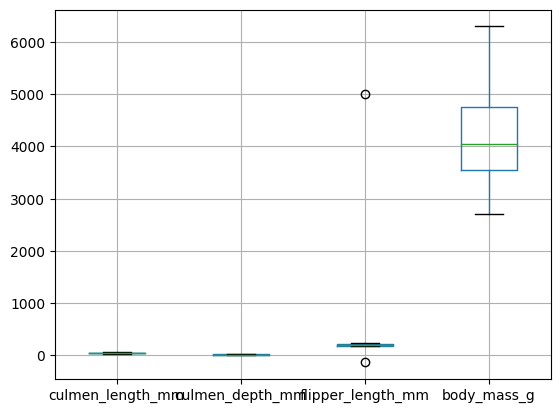

In [137]:
penguins_df.boxplot()  
plt.show()

In [138]:
penguins_df = penguins_df.dropna()
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [139]:
data=pd.get_dummies(penguins_clean,drop_first=True,columns=["sex"])
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [140]:
from sklearn.preprocessing import StandardScaler

sd= StandardScaler()
x=sd.fit_transform(data)
penguins_preprocessed=pd.DataFrame(data=x,columns=data.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [141]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(penguins_preprocessed)
pca.explained_variance_ratio_

n_components = sum(pca.explained_variance_ratio_ > 0.1)
n_components

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
penguins_PCA

array([[-7.29520694e-01, -2.09719199e+00],
       [-1.92930440e+00,  4.12149703e-01],
       [-1.95352479e+00,  3.08485398e-01],
       [-2.28817761e+00, -1.58277726e-01],
       [-6.21821649e-01, -2.51402049e+00],
       [-2.29152165e+00,  1.26445549e-01],
       [ 2.70680676e-01, -1.85613349e+00],
       [-2.33416049e+00,  1.50781067e-01],
       [-5.97023288e-01, -2.65728372e+00],
       [-2.29097852e+00,  1.91722418e-01],
       [-2.03556313e+00,  1.40926894e-02],
       [ 4.03586127e-01, -2.13984589e+00],
       [-2.78682640e+00, -1.42762052e-01],
       [ 3.26341981e-01, -2.46479526e+00],
       [-2.80192041e+00, -2.54639414e-01],
       [-9.70630285e-01, -2.17804104e+00],
       [-2.25960046e+00, -1.47648262e-01],
       [-4.89541085e-01, -1.79101648e+00],
       [-6.35131373e-01, -1.64334482e+00],
       [-2.35187589e+00, -1.08021864e-01],
       [-6.59573801e-01, -2.04230703e+00],
       [-2.23509243e+00,  1.56193095e-01],
       [-3.04481322e+00, -4.48467094e-01],
       [-5.

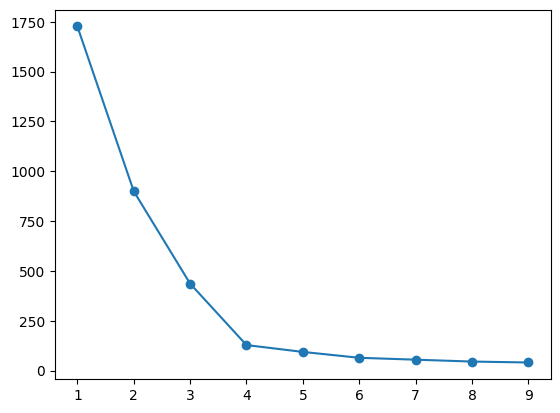

In [142]:
inertia=[]

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

for i in range(1,10):
    kmeans =KMeans(n_clusters=i, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.show()

n_clusters= 4

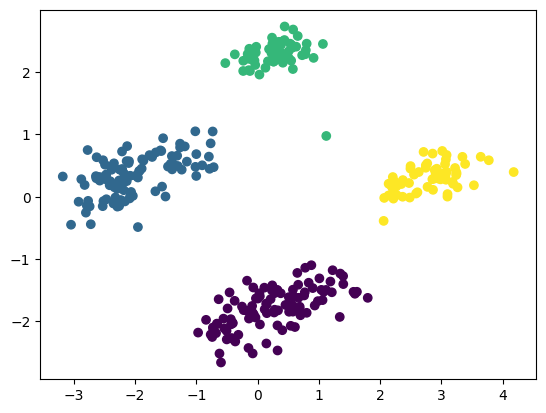

In [143]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)
plt.show()

In [144]:
penguins_clean["label"]=kmeans.labels_

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

stat_penguins = penguins_clean[numeric_columns].groupby("label").mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
